In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import model_utils as mu
import joblib

## Loading and Scaling the Data

In [2]:
df = pd.read_csv('csv_files/final_dataset_filtered.csv')

In [3]:
df['name'] = df['name'].apply(lambda x: x if x in ['Musacea','Guaba','Cacao','Mango'] else 'Otra variedad')

In [4]:
test_df = pd.read_csv('csv_files/test_data_SEDD.csv')

In [5]:
df = mu.split_data_from_test_df(test_df, df)

In [6]:
#remove diameters that are 0
df = df[df['diameter'] != 0]

In [9]:
#now that I have made sure there is no leakage, I can prepare this df for the model 
df_encoded = mu.prepare_data(df, 'diameter')

In [10]:
X_scaled, y = mu.split_data(df_encoded, scaler = False)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Running the Model - Baseline (Random Forest)

In [12]:
#test the baseline model 
baseline = mu.baseline_model(X_train)

/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
history = baseline.fit(X_train, y_train, epochs=100, validation_split=0.1, verbose=1)

Epoch 1/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 121.0407 - val_loss: 44.9343
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 976us/step - loss: 25.1380 - val_loss: 17.8659
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 9.5444 - val_loss: 13.4907
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - loss: 7.7409 - val_loss: 11.3506
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 8.2000 - val_loss: 11.0229
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 708us/step - loss: 7.7506 - val_loss: 9.0987
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step - loss: 7.1535 - val_loss: 8.5617
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - loss: 7.2676 - val_loss: 9.0703
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 7.7311 - val_loss: 9.1309
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - loss: 7.8486 - val_loss: 8.8127
Epoch 11/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 716us/step - loss: 7.9705 - val_loss: 9.0960
Epoch 12/100
41/41 ━━━━━━━━━━━━━━━━

In [14]:
y_pred = baseline.predict(X_test).flatten()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [15]:
mu.mse_and_rmse(y_test, y_pred)

Mean Squared Error: 7.254176491599611
Root Mean Squared Error: 2.6933578469263253


(7.254176491599611, 2.6933578469263253)

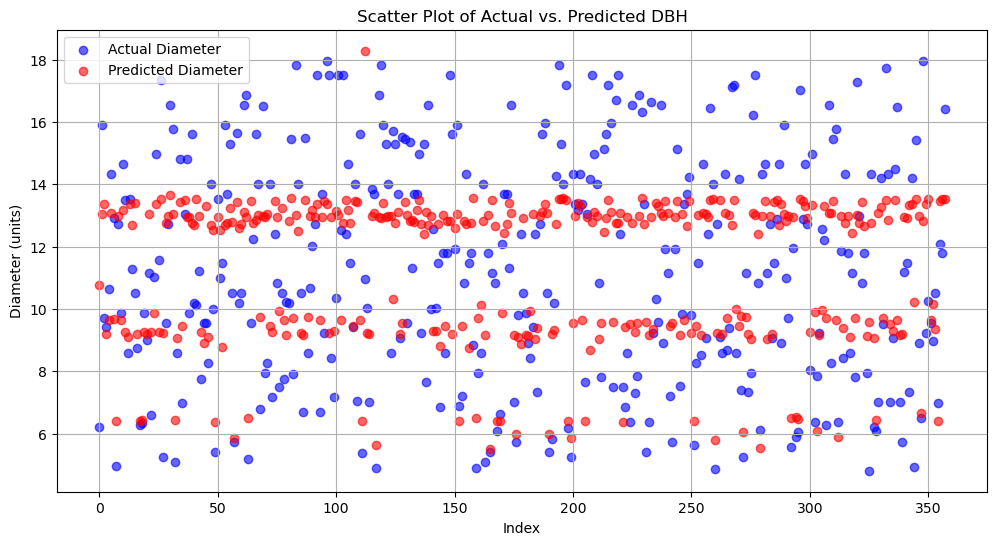

In [16]:
mu.plot_results(y_test, y_pred)

In [17]:
mu.compare(y_test, y_pred)

    Actual Diameter  Predicted Diameter  Difference (Absolute)
0          6.207028           10.759545               4.552517
1         15.915457           13.057478               2.857979
2          9.708429           13.357707               3.649278
3          9.421951            9.179233               0.242718
4         10.631525            9.652213               0.979312
5         14.323911           13.079694               1.244218
6         12.920411            9.669400               3.251011
7          4.954694            6.411390               1.456696
8         12.732366           12.977876               0.245510
9          9.867583            9.641868               0.225716
10        14.642221           13.160951               1.481270
11        13.496308            9.243711               4.252596
12         8.594347            9.088269               0.493922
13        13.528139           13.356686               0.171453
14        11.268144           12.703326               1

____

## SVM Regression

In [18]:
#further split the training data into training and validation sets; didn't need to do this for the baseline model because it took validation_split as an argument
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
best_params = mu.SVR_model(X_train, y_train, X_val, y_val)

C=0.01, epsilon=0.01, gamma=scale, MSE=11.201989965890103
C=0.01, epsilon=0.01, gamma=auto, MSE=11.201759776800513
C=0.01, epsilon=0.01, gamma=0.1, MSE=11.264533785354631
C=0.01, epsilon=0.01, gamma=1, MSE=11.776992555390322
C=0.01, epsilon=0.1, gamma=scale, MSE=11.181075826868316
C=0.01, epsilon=0.1, gamma=auto, MSE=11.180369551113678
C=0.01, epsilon=0.1, gamma=0.1, MSE=11.26378310711586
C=0.01, epsilon=0.1, gamma=1, MSE=11.787521608787808
C=0.01, epsilon=0.5, gamma=scale, MSE=11.129717015717564
C=0.01, epsilon=0.5, gamma=auto, MSE=11.128981760702318
C=0.01, epsilon=0.5, gamma=0.1, MSE=11.177332200011111
C=0.01, epsilon=0.5, gamma=1, MSE=11.7909624448091
C=0.01, epsilon=1, gamma=scale, MSE=11.125841748648591
C=0.01, epsilon=1, gamma=auto, MSE=11.12571475914152
C=0.01, epsilon=1, gamma=0.1, MSE=11.195053372209154
C=0.01, epsilon=1, gamma=1, MSE=11.775611432088123
C=0.1, epsilon=0.01, gamma=scale, MSE=8.866168843101196
C=0.1, epsilon=0.01, gamma=auto, MSE=8.86628955171578
C=0.1, epsilon

In [20]:
# Initialize the SVR model with the best parameters
SVR_model = mu.best_SVR(best_params)

# Train the model on the entire training dataset
SVR_model.fit(X_train, y_train)


SVR(C=1, epsilon=1, gamma=0.1)

In [21]:
y_pred_SVR = SVR_model.predict(X_test)

In [22]:
mu.mse_and_rmse(y_test, y_pred_SVR)

Mean Squared Error: 7.202927331985599
Root Mean Squared Error: 2.683826993676306


(7.202927331985599, 2.683826993676306)

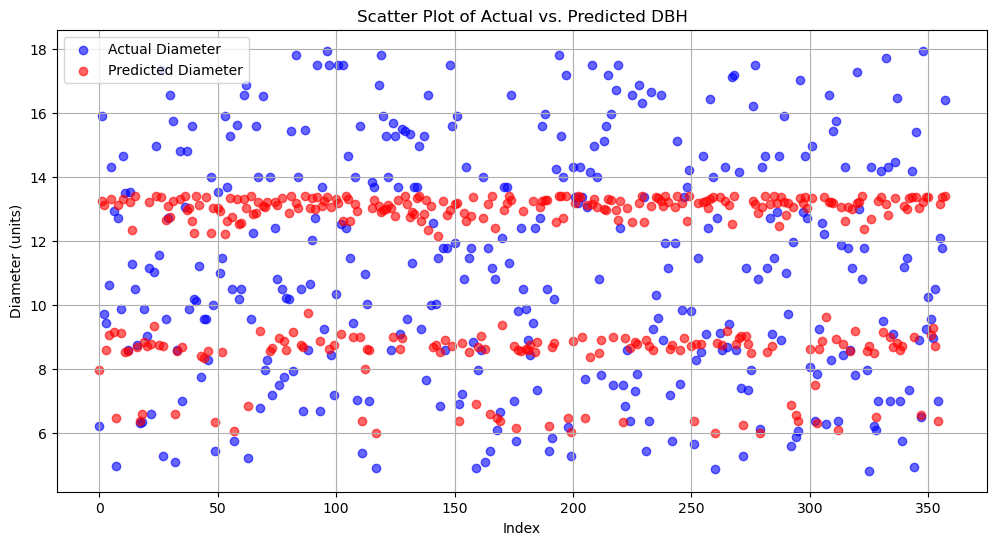

In [23]:
mu.plot_results(y_test, y_pred_SVR)

In [24]:
mu.compare(y_test, y_pred_SVR)

    Actual Diameter  Predicted Diameter  Difference (Absolute)
0          6.207028            7.949739               1.742710
1         15.915457           13.253260               2.662197
2          9.708429           13.131814               3.423385
3          9.421951            8.597316               0.824634
4         10.631525            9.041143               1.590382
5         14.323911           13.308252               1.015659
6         12.920411            9.143347               3.777064
7          4.954694            6.457365               1.502671
8         12.732366           13.113513               0.381147
9          9.867583            9.108353               0.759230
10        14.642221           13.326094               1.316127
11        13.496308            8.526281               4.970027
12         8.594347            8.557740               0.036607
13        13.528139           13.202026               0.326113
14        11.268144           12.355055               1

______ 
## Complex Neural Network 

In [25]:
CNN = mu.CNN(X_train)
CNN.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100


/opt/homebrew/Caskroom/miniconda/base/envs/IRP_2/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 71.7332 - val_loss: 113.6600
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.1564 - val_loss: 104.5153
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.4331 - val_loss: 93.8091
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7860 - val_loss: 84.4557
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.6358 - val_loss: 70.0349
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3400 - val_loss: 62.7572
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.6647 - val_loss: 52.1837
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.9949 - val_loss: 41.8267
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.5140 - val_loss: 34.9429
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.5644 - val_loss: 25.7460
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.3833 - val_loss: 21.9016
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

In [26]:
y_pred_CNN = CNN.predict(X_test).flatten()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [27]:
mu.mse_and_rmse(y_pred_CNN, y_test)

Mean Squared Error: 8.055266805023921
Root Mean Squared Error: 2.838180192486714


(8.055266805023921, 2.838180192486714)

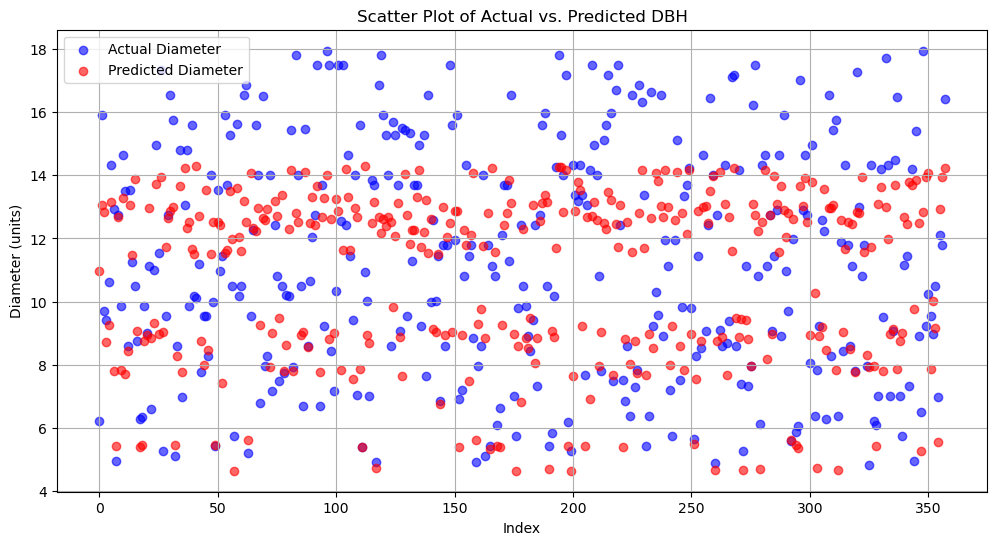

In [28]:
mu.plot_results(y_test, y_pred_CNN)

In [29]:
mu.compare(y_test, y_pred_CNN)

    Actual Diameter  Predicted Diameter  Difference (Absolute)
0          6.207028           10.953385               4.746357
1         15.915457           13.053159               2.862298
2          9.708429           12.830646               3.122217
3          9.421951            8.722936               0.699015
4         10.631525            9.245070               1.386455
5         14.323911           13.140892               1.183019
6         12.920411            7.792301               5.128110
7          4.954694            5.417171               0.462476
8         12.732366           12.690328               0.042038
9          9.867583            7.819302               2.048282
10        14.642221           13.275172               1.367048
11        13.496308            7.703313               5.792994
12         8.594347            8.416727               0.177620
13        13.528139           13.071889               0.456250
14        11.268144           11.465535               0

______ 
## XG Boost Model 

In [30]:
xg_model = mu.xgboost(X_train, y_train, X_val, y_val)

[0]	validation_0-rmse:3.70291
[1]	validation_0-rmse:3.69026
[2]	validation_0-rmse:3.67682
[3]	validation_0-rmse:3.66384
[4]	validation_0-rmse:3.65191
[5]	validation_0-rmse:3.63938
[6]	validation_0-rmse:3.62657
[7]	validation_0-rmse:3.61439
[8]	validation_0-rmse:3.60500
[9]	validation_0-rmse:3.59588
[10]	validation_0-rmse:3.58353
[11]	validation_0-rmse:3.57178
[12]	validation_0-rmse:3.56058
[13]	validation_0-rmse:3.54948
[14]	validation_0-rmse:3.54125
[15]	validation_0-rmse:3.53040
[16]	validation_0-rmse:3.52561
[17]	validation_0-rmse:3.51543
[18]	validation_0-rmse:3.50575
[19]	validation_0-rmse:3.49599
[20]	validation_0-rmse:3.48675
[21]	validation_0-rmse:3.47945
[22]	validation_0-rmse:3.46949
[23]	validation_0-rmse:3.45910
[24]	validation_0-rmse:3.45043
[25]	validation_0-rmse:3.44354
[26]	validation_0-rmse:3.43476
[27]	validation_0-rmse:3.42532
[28]	validation_0-rmse:3.41712
[29]	validation_0-rmse:3.40860
[30]	validation_0-rmse:3.40025
[31]	validation_0-rmse:3.39429
[32]	validation_0-

In [31]:
y_pred_xg = xg_model.predict(X_test)

In [32]:
mu.mse_and_rmse(y_test, y_pred_xg)

Mean Squared Error: 8.075902681069614
Root Mean Squared Error: 2.8418132734346946


(8.075902681069614, 2.8418132734346946)

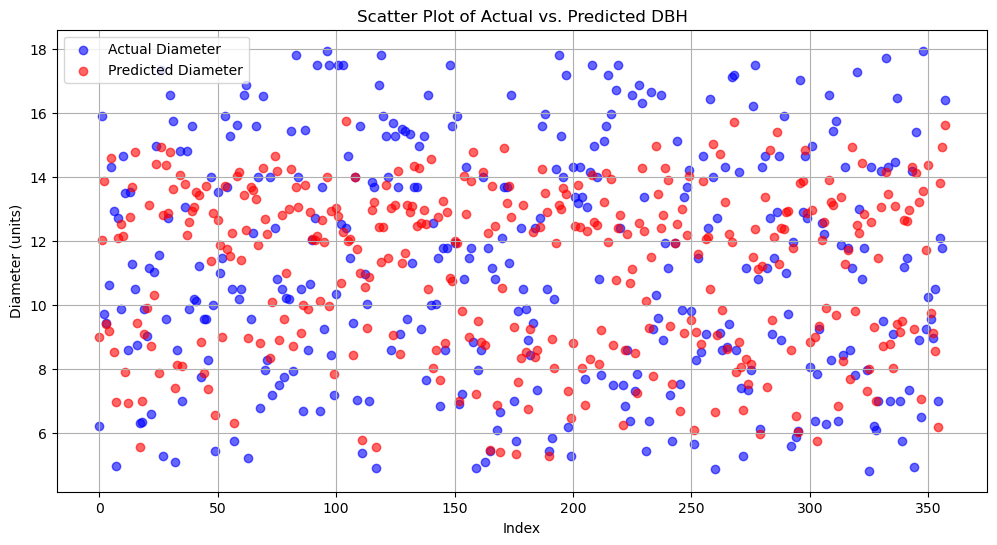

In [33]:
mu.plot_results(y_test, y_pred_xg)

In [34]:
mu.compare(y_test, y_pred_xg)

    Actual Diameter  Predicted Diameter  Difference (Absolute)
0          6.207028            8.992272               2.785244
1         15.915457           12.033192               3.882265
2          9.708429           13.870749               4.162320
3          9.421951            9.389167               0.032784
4         10.631525            9.167074               1.464451
5         14.323911           14.586137               0.262225
6         12.920411            8.510998               4.409413
7          4.954694            6.945752               1.991058
8         12.732366           12.080279               0.652086
9          9.867583           12.521537               2.653953
10        14.642221           12.168623               2.473598
11        13.496308            7.908751               5.587557
12         8.594347            6.913262               1.681085
13        13.528139           12.743973               0.784166
14        11.268144           13.692116               2

In [35]:
#save this model for use in other notebooks 
joblib.dump(xg_model, 'models/diameter_model.pkl')

['models/diameter_model.pkl']

## Best Model (XGBoost) on Test Set 

In [36]:
test_df = test_df[['xmin', 'ymin', 'xmax', 'ymax', 'name', 'diameter']]

In [37]:
test_df_encoded = mu.prepare_data(test_df, 'diameter')

In [38]:
X_test_scaled, y_test = mu.split_data(test_df_encoded, scaler = True)

In [39]:
y_test_pred = xg_model.predict(X_test_scaled)

In [40]:
mu.mse_and_rmse(y_test, y_test_pred)

Mean Squared Error: 10.725337405163193
Root Mean Squared Error: 3.274956092096991


(10.725337405163193, 3.274956092096991)

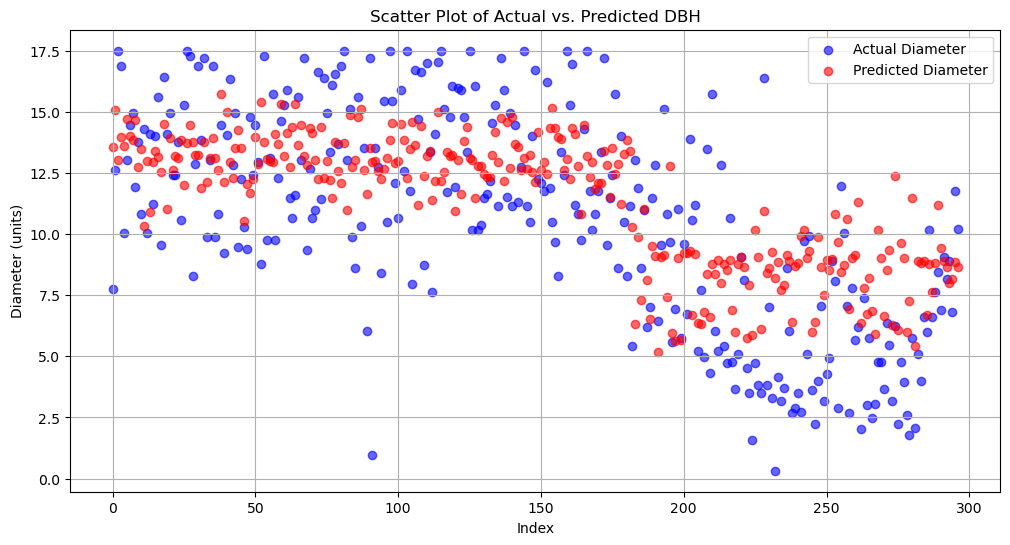

In [41]:
mu.plot_results(y_test, y_test_pred)

In [42]:
mu.compare(y_test, y_test_pred, head_or_tail='tail')

     Actual Diameter  Predicted Diameter  Difference (Absolute)
277         3.947033            9.009273               5.062239
278         2.610329            6.014620               3.404291
279         1.800628            7.267409               5.466780
280         5.770445           11.482342               5.711897
281         2.075122            5.441744               3.366622
282         5.092946            8.889892               3.796945
283         4.010695            8.831232               4.820537
284         6.623584            8.896675               2.273091
285         6.013011            6.678170               0.665159
286        10.185893            8.763690               1.422203
287         6.603438            7.639236               1.035798
288         7.639419            8.799943               1.160524
289         8.435192           11.212868               2.777675
290         6.875477            9.420260               2.544783
291         9.071811            8.895295